# Overall view 

1. Read the graph and store in adjancey list.
    - the text file is adjancacey list seperated by space with first line the number of vertices
2.  Read the motif as adjancey matrix 
    - the text file is edge list with first line number of vertices, type of motif and motf count
    - don't know what type motif means 
    
3. Clique core decompose, core decompose but instead of degree use motif degree ``CDSdecompose.decompose``
    -  Count all k -cliques of graph to get the motif degree of each vertex. Here K is user definded ``KList.ListFast``
    - peeling algorithm to determine the k - clique core values of all verticies
    - return motif data 

        5 columns, n + 1 rows, 
        - columns 0 : vertex removed in step i (index) of peeling algotithm. I.e verticies in ascending order of clique core value
        - column 1 : motif degree of vertex before deletion.
        - column 2 : average motif density of graph after removing the vertex
        - column 3 : Total motifs in graph after removing the vertex 
        - column 4 : core value of the removed vertex

        - row 0 : no vertex is stores rest data is of graph before no - vertex is removed 
        - row 1 : first vertex removed and the rest data 
        - and so on 

4. Locate the k - $\psi$ clique core from the graph, k is definded as the lower bound ``LocateCore.locate``
    -   Based of each core, average motif density, select the core with maximum average motif density and set that core values as the lower bound 
    - remove verticies that are not part of k - $\psi$ clique core 
    - create new graph, new motif data
    - return 
        - new graph, new graph size, 
        - lower bound (core value), 
        - index of deleted vertex in motif records (before which all verticies were removed)
        - num of deleted motifs, 
        - average motif density of current graph, 
        - maximum clique core value.  
5. List all k-cliques and update the clique core values in the new graph returned in step 4. ``KList.ListRecords``
    - Returns 
    - same motif data structure 
    - motif statiscis - map of all cliques.  key is string and value is array of verticies in clique plus 1 representing motif count e.g '0-1-2' $\rightarrow$ (0, 1, 2, 1)

6. Remove edges that are not part of any clique ``InvalidEdgePruning.Prune``
    - returns 
        -   the new graph that only includes the edges that are part of any clique
        -   number of removed edges  

7. Locates all the connected components in the new graph (step 6). ``ComponentDecom.decompose``
    - Performs BFS to find all the connected components
    - returns 
        - Queue of all the connected components
        - each object in queue contains information 
            - new graph (connected component)
            - new graph size
            - new motif data
            - total motifs in component 
            - average motif density of conponent
            - motif degree of each vertex
8. Run the core exact algorithm to find the density subgraph is all the connected components. ``DynamicExactalgo.DynamicExact``
    - returns 
        -   max average motif density
        -   motif number 
        -   total vertex 
        -   connected component  





# Details of each Function 

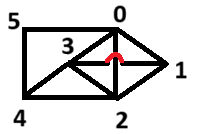

## CDSdecompose.decompose (step 3)

1. Count all k - cliques in the graph to get the motif degree of each vertex. ``KList.ListFast``
    - motif degree = [3, 3, 4, 4, 1, 0]
2.  intialize data structure to store the motif data (described in step 3 of overall)
3.  Create a bin of all motif degrees. that is index i $\rightarrow$ numer of verrices with motif degree i. 
    - motif bin  = [1, 1, 0, 2, 2, 0]

4. Do a cumulaive prefix sum of the bin arrays 
    - cumilative sum = new bin = [0, 1, 2, 2, 4, 6]
5. Sort in accesing order kinda like bucket sort
   - vert: stores the verticies by motif degree ascending order
   - pos: sorts the position of vertx in storted array

   algo:
    1. iter through the vertex: 
    2. set pos[v] = bin[motifDegree[v]]
    3. vert[pos[v]] = v 
    4. bin[motifDegree[v]] += 1

    | Vertex | Motif Degree | Bin | Position | Vert | Bin Array       | Pos Array       | Vert Array       |
    |--------|--------------|-----|----------|------|-----------------|-----------------|------------------|
    |    0   |      3       |  2  | 0 --> 2  |2 --> 0| [0, 1, 2, 3, 4, 6]    | [2, -, -, -, -, -]   | [-, -, 0, -, -, -]    |
    |    1   |      3       |  3  | 1 --> 3  | 3-->1 | [0, 1, 2, 4, 4, 6]    | [2, 3, -, -, -, -]   | [-, -, 0, 1, -, -]    |
    |    2   |      4       |  4  | 2 --> 4  |4 -->2 | [0, 1, 2, 4, 5, 6]    | [2, 3, 4, -, -, -]   | [-, -, 0, 1, 2, -]    |
    |    3   |      4       |  5  | 3 -->5   |5 -->3 | [0, 1, 2, 4, 6, 6]    | [2, 3, 4, 5, -, -]   | [-, -, 0, 1, 2, 3]    |
    |    4   |      1       |  1  | 4 -->1   |1 -->4 | [0, 2, 2, 4, 6, 6]    | [2, 3, 4, 5, 1, -]   | [-, 4, 0, 1, 2, 3]    |
    |    5   |      0       |  0  | 5 -->0   |0 -->5 | [1, 2, 2, 4, 6, 6]    | [2, 3, 4, 5, 1, 0]   | [5, 4, 0, 1, 2, 3]    |

6. Peeling clique core decomposition 

    Algo
    1. Iter through vertex $v$
    2. find index of the vertex with minimum motif degree
    3. Extract neighborhood arround the vertex $v$ which is at max 2 hops away, and get the motif degree of the verticies in neighborhood (motif degree only because of cliques that include the vertex $v$ ) ``Generate``
    return
        -  maps of vertex $\rightarrow$ motif degree
        - count of verticies removed
    4. iter through the map (step3):
        1. increament the deleted motif count $count_{dm}$
        2. decrease the motif degree of the vertex
    5. decrease motif count by $count_{dm}$ in motif data at row $v+1$
    6. update the average motif density in motif data row number vertex removed $v+1$ as vertex and motif count changed 
    